<a href="https://colab.research.google.com/github/dittion/petroleum-and-gas/blob/main/petroleum_and_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/electra_modbus.csv')
print(data.head())


   Time               smac               dmac          sip          dip  \
0     0  00:1b:1b:c1:41:1b  08:00:27:79:b0:4a  10.70.38.51  10.70.38.55   
1  2107  08:00:27:79:b0:4a  00:0e:8c:e1:dd:58  10.70.38.51  10.70.38.55   
2   377  00:1b:1b:c1:41:1b  00:0e:8c:e1:de:9c  10.70.38.51  10.70.38.56   
3  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   
4  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   

   request   fc  error  address  data           label  
0      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
1      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
2      1.0  3.0    0.0      1.0  68.0          NORMAL  
3      0.0  3.0    0.0      1.0   0.0  MITM_UNALTERED  
4      0.0  3.0    0.0      2.0   0.0  MITM_UNALTERED  


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium 

In [ ]:
!pip install pycaret
import pycaret
print(pycaret.__version__) # Use __version__ to get the version

3.3.2


In [ ]:
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


In [ ]:
# import pycaret anomaly and init setup
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# import AnomalyExperiment and init the class
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [ ]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# train iforest model
iforest = create_model('iforest')
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


In [ ]:
# tsne plot anomalies
plot_model(iforest, plot = 'tsne')

In [ ]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
iforest_pred = predict_model(iforest, data=data)
iforest_pred

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.083981
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.075839
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.052903
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.075104


In [ ]:
# save pipeline
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=123, verbose=0))]),
 'iforest_pipeline.pkl')

In [ ]:
# load pipeline
loaded_iforest_pipeline = load_model('iforest_pipeline')
loaded_iforest_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                             'Col5', 'Col6', 'Col7', 'Col8',
                                             'Col9', 'Col10'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

In [ ]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754
...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
# init setup with bin_numeric_feature

s = setup(data, session_id = 123,
          bin_numeric_features=['Col1'])

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


<Axes: >

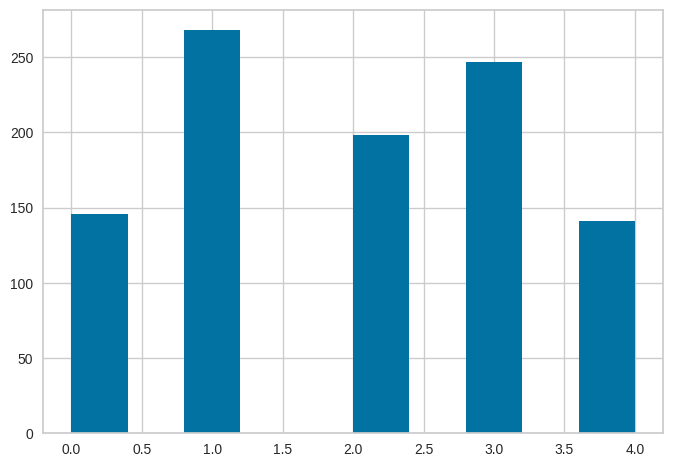

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Col1'].hist()

<Axes: >

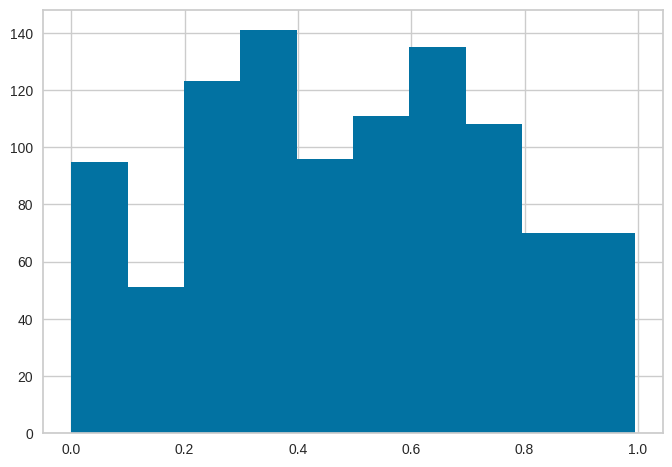

In [ ]:
get_config('X_train')['Col1'].hist()

In [ ]:
# from pycaret.anomaly import *
# s = setup(data, session_id = 123, log_experiment='mlflow', experiment_name='anomaly_project')
# train iforest
# iforest = create_model('iforest')
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# train iforest model
iforest = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
# train iforest with specific model parameter
create_model('iforest', contamination = 0.1)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [ ]:
# help(create_model)

In [ ]:
iforest_results = assign_model(iforest)
iforest_results

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.024763
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.083637
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.021481
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.044031
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.026150
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,-0.076718
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,-0.059275
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,-0.058574
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,-0.089169


In [ ]:
# tsne plot of anomalies
plot_model(iforest, plot = 'tsne')


In [ ]:
# umap plot of anomalies (you need to install umap library for this separately)
# plot_model(iforest, plot = 'umap')
# help(plot_model)

In [ ]:
# deploy model on aws s3
# deploy_model(iforest, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [ ]:
# save model
save_model(iforest, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['Col1'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Col1', 'Col2', 'Col3', 'Col4',
                                             'Col5', 'Col6', 'Col7', 'Col8',
                                             'Col9', 'Col10'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['Col1'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Replace 'path_to_your_dataset.csv' with the path to the dataset file
df = pd.read_csv('/content/electra_modbus.csv')

# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Statistical summary
print(df.describe())

   Time               smac               dmac          sip          dip  \
0     0  00:1b:1b:c1:41:1b  08:00:27:79:b0:4a  10.70.38.51  10.70.38.55   
1  2107  08:00:27:79:b0:4a  00:0e:8c:e1:dd:58  10.70.38.51  10.70.38.55   
2   377  00:1b:1b:c1:41:1b  00:0e:8c:e1:de:9c  10.70.38.51  10.70.38.56   
3  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   
4  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   

   request   fc  error  address  data           label  
0      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
1      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
2      1.0  3.0    0.0      1.0  68.0          NORMAL  
3      0.0  3.0    0.0      1.0   0.0  MITM_UNALTERED  
4      0.0  3.0    0.0      2.0   0.0  MITM_UNALTERED  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44838 entries, 0 to 44837
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     44838 non-null

In [ ]:
# Handle missing values, for example, using forward fill
df.fillna(method='ffill', inplace=True)

# Separate features and target if there is a target column
features = df.drop(columns=['target']) if 'target' in df.columns else df
target = df['target'] if 'target' in df.columns else None

# Identify non-numeric columns
non_numeric_cols = features.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example: drop them)
# You might need a different strategy based on the meaning of these columns
features = features.drop(columns=non_numeric_cols)

# Scale the features
scaler = StandardScaler()

In [ ]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features) # Scale the features

# Fit the model on the scaled features
iso_forest.fit(features_scaled)

# Predict anomalies
df['anomaly_score'] = iso_forest.decision_function(features_scaled)
df['anomaly'] = iso_forest.predict(features_scaled)

# Convert predictions: -1 for anomalies, 1 for normal instances
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Show the anomaly score and anomaly predictions
print(df[['anomaly_score', 'anomaly']].head())

   anomaly_score  anomaly
0      -0.145322        1
1      -0.145322        1
2      -0.145322        1
3       0.038504        0
4       0.039570        0


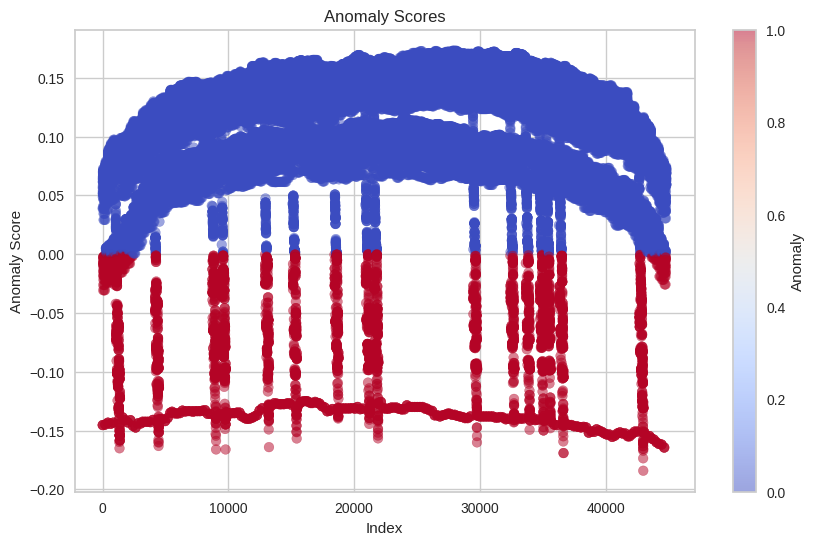

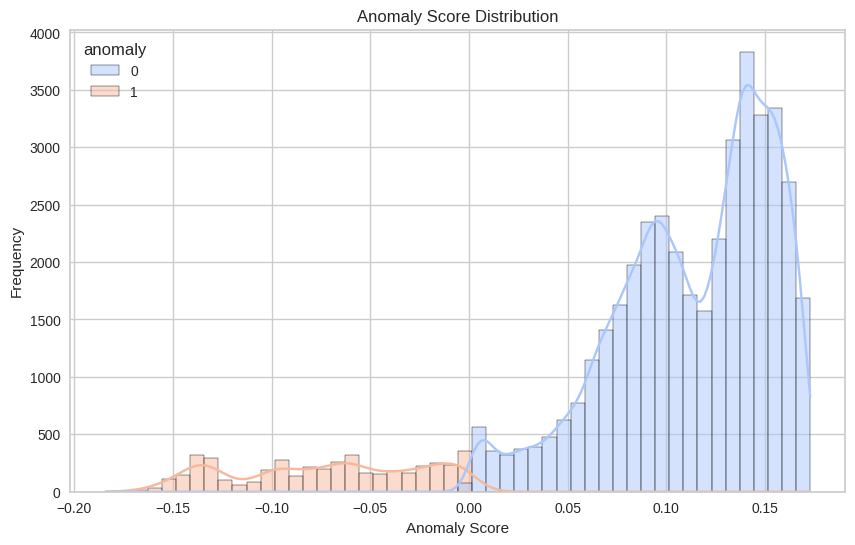

In [ ]:
# Plot anomaly scores
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['anomaly_score'], c=df['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Scores')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.colorbar(label='Anomaly')
plt.show()

# Histogram of anomaly scores (modified)
plt.figure(figsize=(10, 6))
# Use the 'anomaly' column directly for hue, assuming it's categorical
sns.histplot(data=df, x='anomaly_score', hue='anomaly', bins=50, kde=True, palette='coolwarm')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Replace 'path_to_your_dataset.csv' with the path to the dataset file
df = pd.read_csv('/content/electra_modbus.csv')

# Now you can use 'df' in your subsequent code
print(df.dtypes)
print(df.describe().transpose())

# ... rest of your code

Time        int64
smac       object
dmac       object
sip        object
dip        object
request     int64
fc          int64
error       int64
address     int64
data        int64
label      object
dtype: object
           count          mean           std  min         25%         50%  \
Time     89589.0  4.866222e+07  2.807970e+07  0.0  24255752.0  48751432.0   
request  89589.0  1.316010e-02  1.139608e-01  0.0         0.0         0.0   
fc       89589.0  3.000000e+00  0.000000e+00  3.0         3.0         3.0   
error    89589.0  1.010169e-02  1.479322e+00  0.0         0.0         0.0   
address  89589.0  5.726884e+01  7.528501e+01  0.0        19.0        38.0   
data     89589.0  1.906480e+04  2.975350e+04  0.0         0.0         0.0   

                75%         max  
Time     72501608.0  98000381.0  
request         0.0         1.0  
fc              3.0         3.0  
error           0.0       255.0  
address        58.0       408.0  
data        65535.0     65535.0  


Time        int64
smac       object
dmac       object
sip        object
dip        object
request     int64
fc          int64
error       int64
address     int64
data        int64
label      object
dtype: object
           count          mean           std  min         25%         50%  \
Time     89589.0  4.866222e+07  2.807970e+07  0.0  24255752.0  48751432.0   
request  89589.0  1.316010e-02  1.139608e-01  0.0         0.0         0.0   
fc       89589.0  3.000000e+00  0.000000e+00  3.0         3.0         3.0   
error    89589.0  1.010169e-02  1.479322e+00  0.0         0.0         0.0   
address  89589.0  5.726884e+01  7.528501e+01  0.0        19.0        38.0   
data     89589.0  1.906480e+04  2.975350e+04  0.0         0.0         0.0   

                75%         max  
Time     72501608.0  98000381.0  
request         0.0         1.0  
fc              3.0         3.0  
error           0.0       255.0  
address        58.0       408.0  
data        65535.0     65535.0  


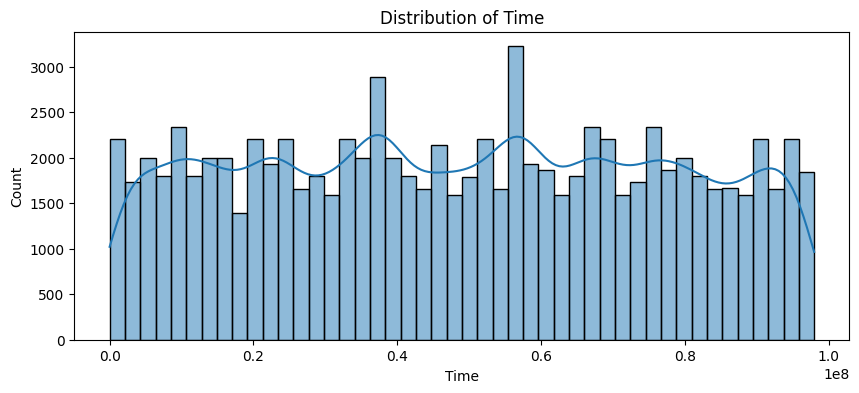

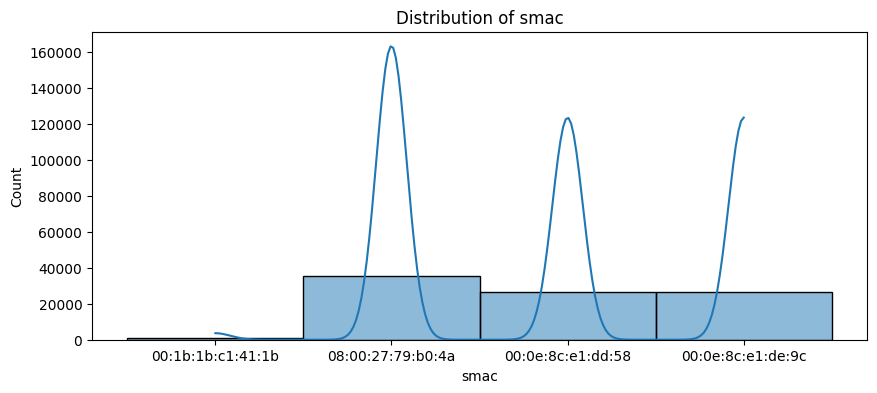

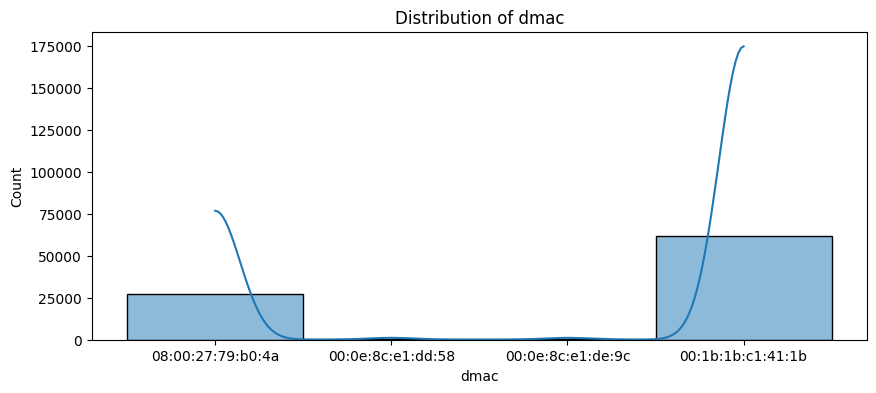

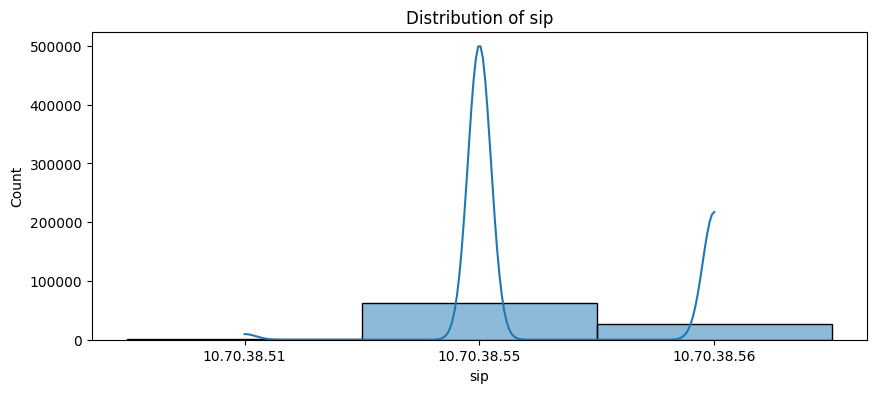

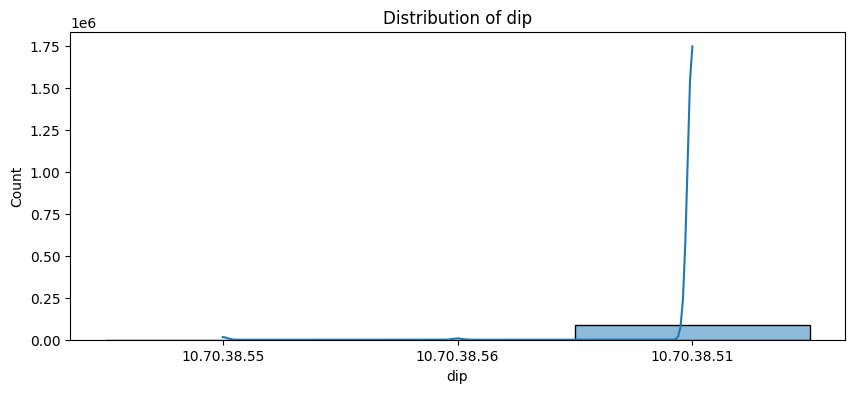

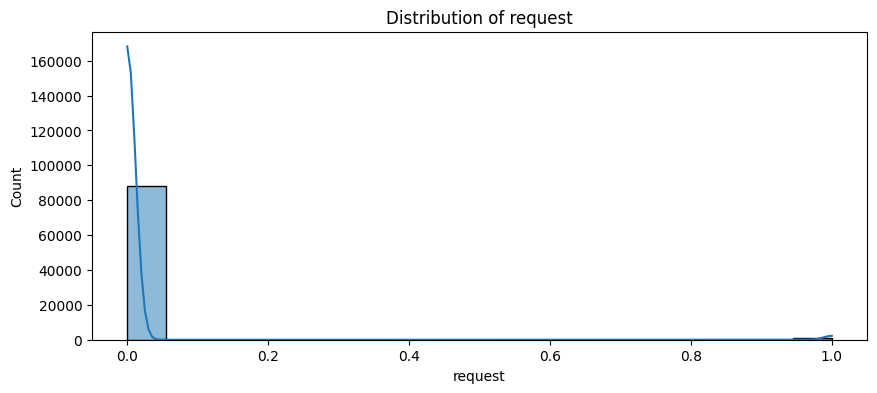

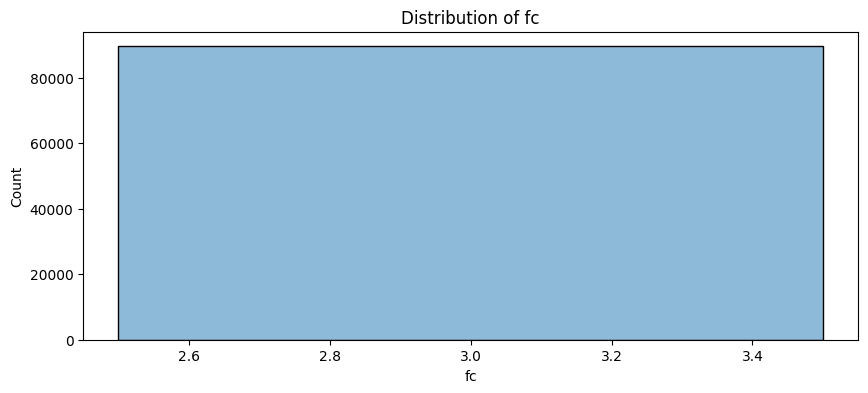

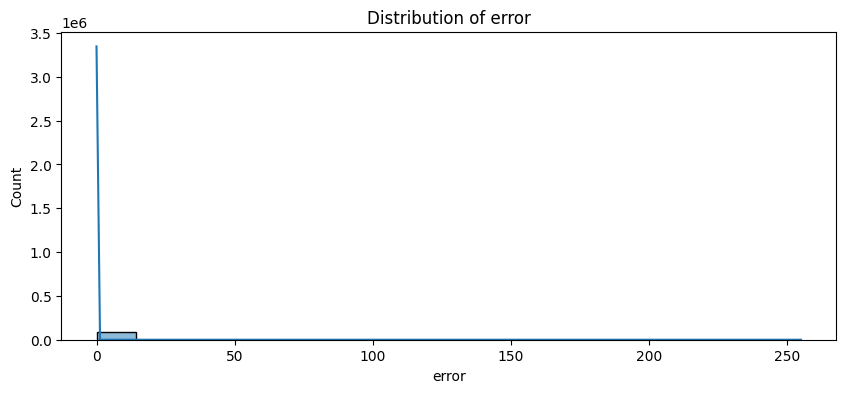

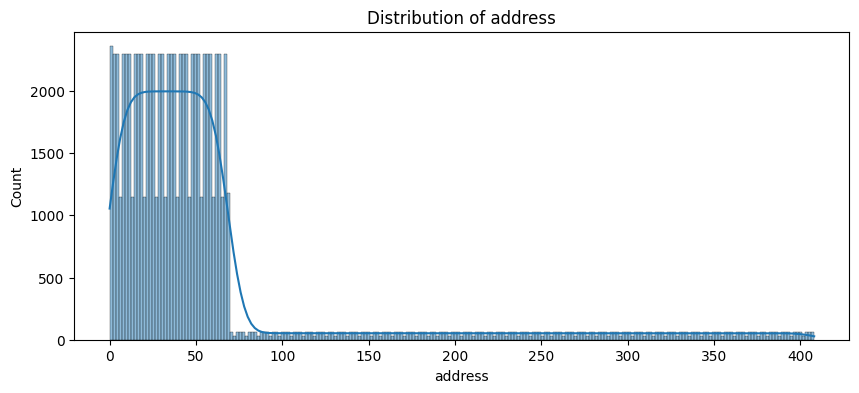

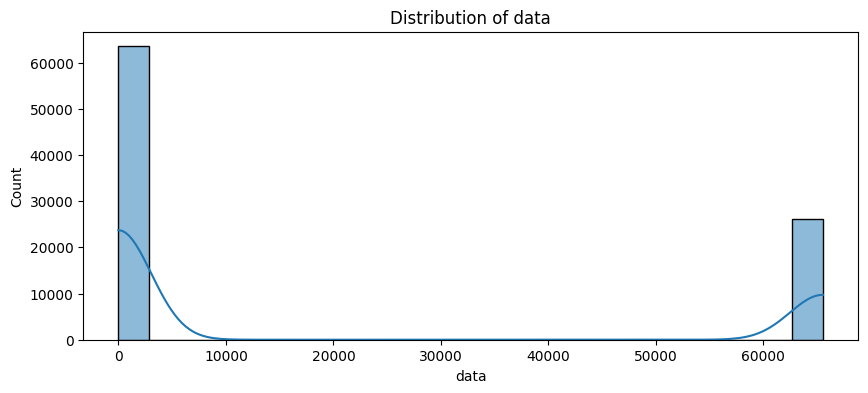

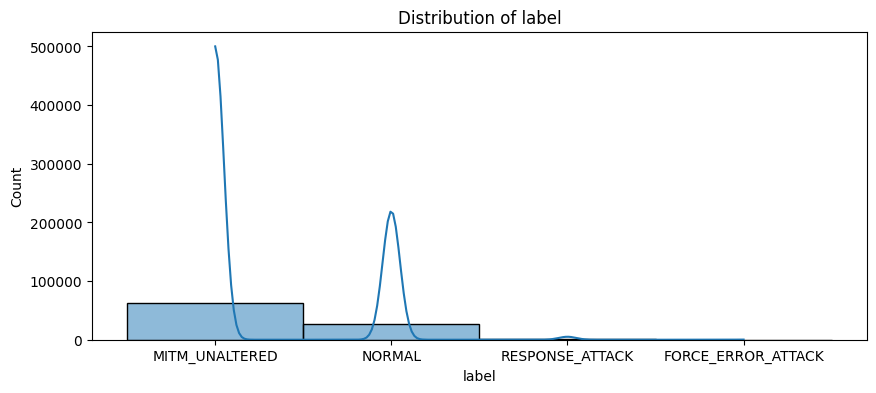

In [ ]:
# Check data types
print(df.dtypes)

# Summary statistics
print(df.describe().transpose())

# Plotting distributions
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
df = pd.read_csv('/content/electra_modbus.csv')
print(df.head())

# Step 2: Define features and target
if 'target' in df.columns:
    features = df.drop(columns=['target', 'timestamp'])  # Modify as needed for your dataset
    target = df['target']
else:
    # Drop non-numerical columns like 'Time' or 'timestamp'
    features = df.select_dtypes(include=['number'])
    target = None

# Step 3: Scale the features
robust_scaler = RobustScaler()
features_scaled = robust_scaler.fit_transform(features)

   Time               smac               dmac          sip          dip  \
0     0  00:1b:1b:c1:41:1b  08:00:27:79:b0:4a  10.70.38.51  10.70.38.55   
1  2107  08:00:27:79:b0:4a  00:0e:8c:e1:dd:58  10.70.38.51  10.70.38.55   
2   377  00:1b:1b:c1:41:1b  00:0e:8c:e1:de:9c  10.70.38.51  10.70.38.56   
3  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   
4  8718  00:0e:8c:e1:dd:58  08:00:27:79:b0:4a  10.70.38.55  10.70.38.51   

   request   fc  error  address  data           label  
0      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
1      1.0  3.0    0.0      1.0  68.0  MITM_UNALTERED  
2      1.0  3.0    0.0      1.0  68.0          NORMAL  
3      0.0  3.0    0.0      1.0   0.0  MITM_UNALTERED  
4      0.0  3.0    0.0      2.0   0.0  MITM_UNALTERED  


In [14]:
# Step 3: Scale the features
robust_scaler = RobustScaler()
features_scaled = robust_scaler.fit_transform(features.fillna(features.mean())) # Impute missing values with the mean

# Step 4: Train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(features_scaled)

# Predict anomalies
df['anomaly_score'] = iso_forest.decision_function(features_scaled)
df['anomaly'] = iso_forest.predict(features_scaled)

# Convert predictions: -1 for anomalies, 1 for normal instances
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

In [18]:
# Step 5: Evaluation (if target is available)
if target is not None:
    print(classification_report(target, df['anomaly']))
    print(confusion_matrix(target, df['anomaly']))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(target, df['anomaly_score'])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()



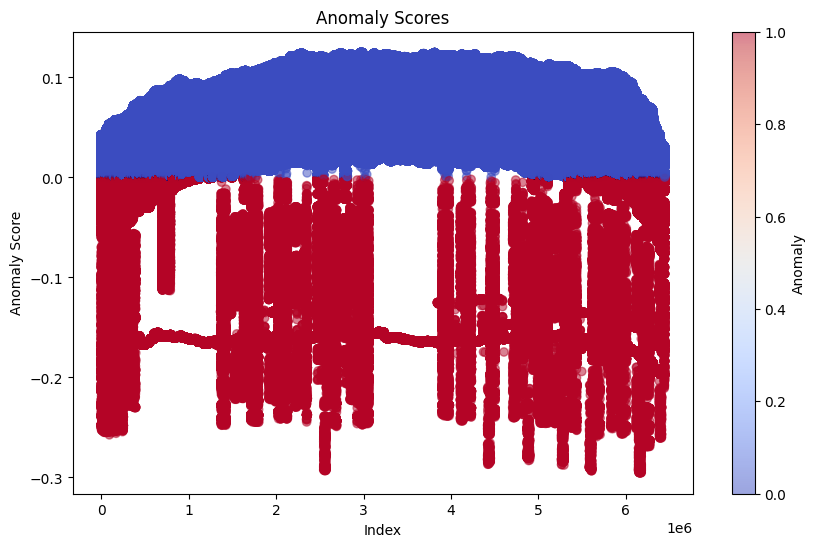

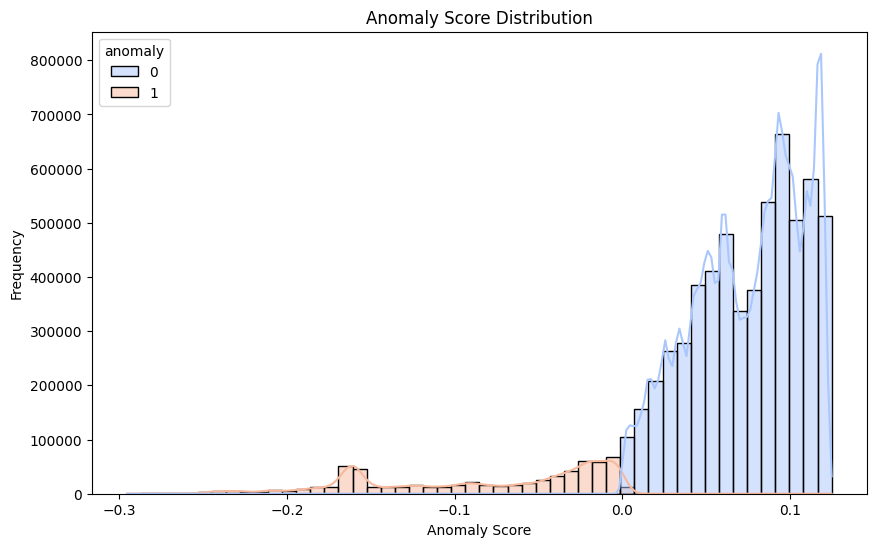

In [17]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['anomaly_score'], c=df['anomaly'], cmap='coolwarm', alpha=0.5)
plt.title('Anomaly Scores')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.colorbar(label='Anomaly')
plt.show()

# --- Modified section ---
plt.figure(figsize=(10, 6))
# Pass the entire DataFrame and specify 'x' and 'hue'
sns.histplot(df, x='anomaly_score', hue='anomaly', bins=50, kde=True, palette='coolwarm')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()